In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import make_scorer,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por-modelling-range_G3_10-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,2,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,1,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,2,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,2,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [3]:
df_por.shape

(649, 44)

In [4]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Linear Regression

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred = model.predict(X_test)

In [8]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.869385,5
1,3.605957,3
2,4.061035,5
3,3.523682,3
4,2.917480,3


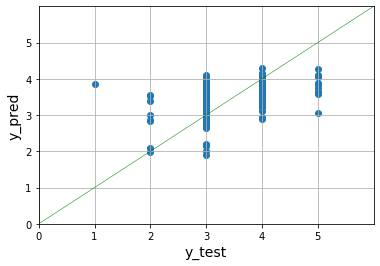

In [9]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [10]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [11]:
rmse(y_pred,y_test)

0.7202154689025155

## Decision Tree Regression

In [12]:
rmse_scorer = make_scorer(rmse,greater_is_better = False)

In [13]:
param_grid = {'min_samples_leaf':[1,5,10,20,50,100],'max_depth':[1,2,5,10,20,30,50]}

grid_search_cv = GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = param_grid,cv=5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             pre_di

In [14]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
y_pred = grid_search_cv.predict(X_test)

In [16]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.564039,5
1,3.564039,3
2,3.564039,5
3,3.564039,3
4,3.564039,3


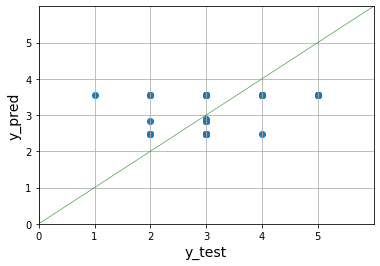

In [17]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [18]:
rmse(y_pred,y_test)

0.7395077278988104

## Random Forest Regression

In [19]:
param_grid = {'min_samples_leaf':[1,10,50],'max_depth':[1,5,30],'n_estimators':[10,50,100]}

grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(),param_grid = param_grid,cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [20]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
y_pred = grid_search_cv.predict(X_test)

In [22]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.603716,5
1,3.510609,3
2,3.866491,5
3,3.610680,3
4,3.304917,3


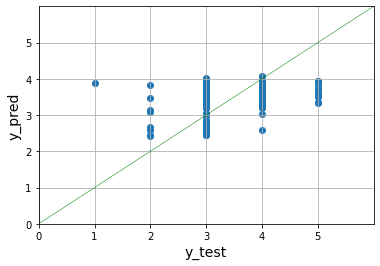

In [23]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [24]:
rmse(y_pred,y_test)

0.7242911438355258

## XGBoost 

In [25]:
parameters = {'max_depth':[1,5,30],'learning_rate':[0.01,0.1,0.3],'n_estimators':[10,50,100],'objective':'reg:squarederror'}

grid_search_cv = GridSearchCV(estimator = xgboost.XGBRegressor(silent = True),param_grid = param_grid,
                              cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 30],
                         'min_samples_leaf': [1, 10, 50],
                        

In [26]:
grid_search_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, min_samples_leaf=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1)

In [27]:
y_pred = grid_search_cv.predict(X_test)

In [28]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.473508,5
1,3.455019,3
2,3.655630,5
3,3.546696,3
4,3.199928,3


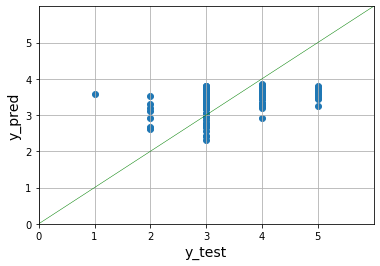

In [29]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [30]:
rmse(y_pred,y_test)

0.7112754853460213

## Neural Network 

In [31]:
sc = MinMaxScaler()

In [32]:
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train.shape

(519, 43)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [36]:
model.fit(X_train,y_train,validation_data = (X_test,y_test.values),batch_size = 128,epochs = 300)

Train on 519 samples, validate on 130 samples
Epoch 1/300
519/519 [==============================] - 1s 2ms/sample - loss: 10.8634 - val_loss: 10.2502
Epoch 2/300
519/519 [==============================] - 0s 79us/sample - loss: 8.7623 - val_loss: 7.9302
Epoch 3/300
519/519 [==============================] - 0s 60us/sample - loss: 6.3300 - val_loss: 5.1356
Epoch 4/300
519/519 [==============================] - 0s 58us/sample - loss: 3.9068 - val_loss: 2.3681
Epoch 5/300
519/519 [==============================] - 0s 67us/sample - loss: 2.0053 - val_loss: 0.8361
Epoch 6/300
519/519 [==============================] - 0s 62us/sample - loss: 2.3811 - val_loss: 0.7129
Epoch 7/300
519/519 [==============================] - 0s 69us/sample - loss: 2.2829 - val_loss: 0.9874
Epoch 8/300
519/519 [==============================] - 0s 62us/sample - loss: 1.8471 - val_loss: 1.5206
Epoch 9/300
519/519 [==============================] - 0s 56us/sample - loss: 1.8491 - val_loss: 1.6554
Epoch 10/300
519/

519/519 [==============================] - 0s 64us/sample - loss: 0.9584 - val_loss: 0.9783
Epoch 79/300
519/519 [==============================] - 0s 62us/sample - loss: 0.8794 - val_loss: 1.0890
Epoch 80/300
519/519 [==============================] - 0s 56us/sample - loss: 0.8704 - val_loss: 1.1112
Epoch 81/300
519/519 [==============================] - 0s 58us/sample - loss: 0.8553 - val_loss: 1.1165
Epoch 82/300
519/519 [==============================] - 0s 54us/sample - loss: 0.8115 - val_loss: 0.8877
Epoch 83/300
519/519 [==============================] - 0s 54us/sample - loss: 0.9176 - val_loss: 0.8334
Epoch 84/300
519/519 [==============================] - 0s 58us/sample - loss: 0.7892 - val_loss: 0.9960
Epoch 85/300
519/519 [==============================] - 0s 54us/sample - loss: 0.7615 - val_loss: 1.0193
Epoch 86/300
519/519 [==============================] - 0s 56us/sample - loss: 0.8121 - val_loss: 1.0282
Epoch 87/300
519/519 [==============================] - 0s 58us/samp

519/519 [==============================] - 0s 54us/sample - loss: 0.6574 - val_loss: 0.7397
Epoch 156/300
519/519 [==============================] - 0s 56us/sample - loss: 0.6197 - val_loss: 0.7541
Epoch 157/300
519/519 [==============================] - 0s 56us/sample - loss: 0.6587 - val_loss: 0.7671
Epoch 158/300
519/519 [==============================] - 0s 54us/sample - loss: 0.7427 - val_loss: 0.6972
Epoch 159/300
519/519 [==============================] - 0s 54us/sample - loss: 0.6425 - val_loss: 0.7260
Epoch 160/300
519/519 [==============================] - 0s 56us/sample - loss: 0.6359 - val_loss: 0.7234
Epoch 161/300
519/519 [==============================] - 0s 56us/sample - loss: 0.6731 - val_loss: 0.7186
Epoch 162/300
519/519 [==============================] - 0s 56us/sample - loss: 0.6566 - val_loss: 0.7480
Epoch 163/300
519/519 [==============================] - 0s 54us/sample - loss: 0.6280 - val_loss: 0.7758
Epoch 164/300
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 56us/sample - loss: 0.5214 - val_loss: 0.6152
Epoch 233/300
519/519 [==============================] - 0s 58us/sample - loss: 0.5527 - val_loss: 0.6148
Epoch 234/300
519/519 [==============================] - 0s 58us/sample - loss: 0.5587 - val_loss: 0.6236
Epoch 235/300
519/519 [==============================] - 0s 60us/sample - loss: 0.5588 - val_loss: 0.5891
Epoch 236/300
519/519 [==============================] - 0s 54us/sample - loss: 0.5403 - val_loss: 0.5859
Epoch 237/300
519/519 [==============================] - 0s 52us/sample - loss: 0.5875 - val_loss: 0.6948
Epoch 238/300
519/519 [==============================] - ETA: 0s - loss: 0.530 - 0s 56us/sample - loss: 0.5253 - val_loss: 0.7551
Epoch 239/300
519/519 [==============================] - 0s 54us/sample - loss: 0.5819 - val_loss: 0.6822
Epoch 240/300
519/519 [==============================] - 0s 54us/sample - loss: 0.5883 - val_loss: 0.5982
Epoch 241/300
519/519 [=============

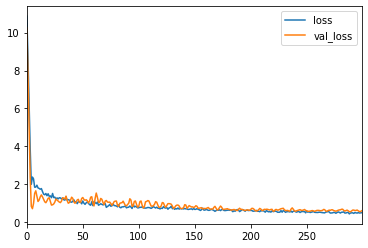

In [37]:
losses = pd.DataFrame(model.history.history)

losses.plot();

In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.843124,5
1,3.103284,3
2,4.056327,5
3,2.856721,3
4,2.935777,3


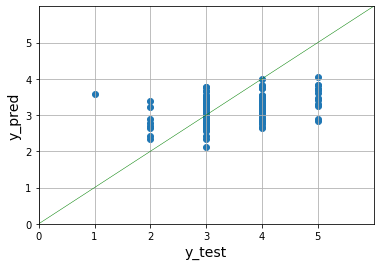

In [40]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [41]:
rmse(y_pred,y_test)

0.7754187686475054

## Stacking 

In [42]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,random_state = 42)

### Base Models 

In [43]:
model = DecisionTreeRegressor(min_samples_leaf = 20,max_depth = 10)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [44]:
model = RandomForestRegressor(min_samples_leaf = 1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [45]:
model = xgboost.XGBRegressor(silent = True,max_depth = 1,learning_rate = 0.1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [46]:
model = Sequential()

model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

model.fit(X_train,y_train,validation_data = (X_base,y_base),batch_size = 128,epochs = 300)

Train on 519 samples, validate on 259 samples
Epoch 1/300
519/519 [==============================] - 1s 1ms/sample - loss: 10.7601 - val_loss: 8.8585
Epoch 2/300
519/519 [==============================] - 0s 62us/sample - loss: 7.8120 - val_loss: 6.1372
Epoch 3/300
519/519 [==============================] - 0s 67us/sample - loss: 5.0744 - val_loss: 3.2849
Epoch 4/300
519/519 [==============================] - 0s 60us/sample - loss: 2.6672 - val_loss: 1.1709
Epoch 5/300
519/519 [==============================] - 0s 64us/sample - loss: 2.0388 - val_loss: 0.8136
Epoch 6/300
519/519 [==============================] - 0s 60us/sample - loss: 2.2692 - val_loss: 0.8056
Epoch 7/300
519/519 [==============================] - 0s 60us/sample - loss: 1.9236 - val_loss: 1.1645
Epoch 8/300
519/519 [==============================] - 0s 60us/sample - loss: 1.7523 - val_loss: 1.5631
Epoch 9/300
519/519 [==============================] - 0s 35us/sample - loss: 1.7852 - val_loss: 1.5181
Epoch 10/300
519/5

519/519 [==============================] - 0s 60us/sample - loss: 0.7949 - val_loss: 0.8830
Epoch 79/300
519/519 [==============================] - 0s 60us/sample - loss: 0.8419 - val_loss: 0.7864
Epoch 80/300
519/519 [==============================] - 0s 58us/sample - loss: 0.8357 - val_loss: 0.7287
Epoch 81/300
519/519 [==============================] - 0s 60us/sample - loss: 0.8749 - val_loss: 0.8879
Epoch 82/300
519/519 [==============================] - 0s 60us/sample - loss: 0.7672 - val_loss: 1.0021
Epoch 83/300
519/519 [==============================] - 0s 58us/sample - loss: 0.7268 - val_loss: 0.8883
Epoch 84/300
519/519 [==============================] - 0s 58us/sample - loss: 0.8008 - val_loss: 0.7674
Epoch 85/300
519/519 [==============================] - 0s 58us/sample - loss: 0.7025 - val_loss: 0.6911
Epoch 86/300
519/519 [==============================] - 0s 60us/sample - loss: 0.8075 - val_loss: 0.8183
Epoch 87/300
519/519 [==============================] - 0s 58us/samp

519/519 [==============================] - 0s 66us/sample - loss: 0.6495 - val_loss: 0.5773
Epoch 156/300
519/519 [==============================] - 0s 66us/sample - loss: 0.6319 - val_loss: 0.5584
Epoch 157/300
519/519 [==============================] - 0s 62us/sample - loss: 0.5895 - val_loss: 0.5803
Epoch 158/300
519/519 [==============================] - 0s 60us/sample - loss: 0.6095 - val_loss: 0.5647
Epoch 159/300
519/519 [==============================] - 0s 60us/sample - loss: 0.6041 - val_loss: 0.5715
Epoch 160/300
519/519 [==============================] - 0s 62us/sample - loss: 0.6172 - val_loss: 0.5454
Epoch 161/300
519/519 [==============================] - 0s 60us/sample - loss: 0.5560 - val_loss: 0.5059
Epoch 162/300
519/519 [==============================] - 0s 83us/sample - loss: 0.5689 - val_loss: 0.4995
Epoch 163/300
519/519 [==============================] - 0s 81us/sample - loss: 0.6040 - val_loss: 0.5846
Epoch 164/300
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 58us/sample - loss: 0.5629 - val_loss: 0.4101
Epoch 233/300
519/519 [==============================] - 0s 58us/sample - loss: 0.5666 - val_loss: 0.4440
Epoch 234/300
519/519 [==============================] - 0s 60us/sample - loss: 0.5318 - val_loss: 0.4260
Epoch 235/300
519/519 [==============================] - 0s 60us/sample - loss: 0.4996 - val_loss: 0.4138
Epoch 236/300
519/519 [==============================] - 0s 58us/sample - loss: 0.5157 - val_loss: 0.4243
Epoch 237/300
519/519 [==============================] - 0s 60us/sample - loss: 0.5524 - val_loss: 0.4325
Epoch 238/300
519/519 [==============================] - 0s 58us/sample - loss: 0.5040 - val_loss: 0.4419
Epoch 239/300
519/519 [==============================] - 0s 56us/sample - loss: 0.4942 - val_loss: 0.3566
Epoch 240/300
519/519 [==============================] - 0s 60us/sample - loss: 0.5119 - val_loss: 0.3378
Epoch 241/300
519/519 [==============================] - 0s 

In [47]:
y_pred_nn_meta = model.predict(X_meta)
y_pred_nn_test = model.predict(X_test)

In [48]:
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)
y_pred_nn_meta = pd.DataFrame(y_pred_nn_meta)

df_X_meta = pd.concat([y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta],axis = 1)
df_X_meta.columns = ['y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta','y_pred_nn_meta']

df_X_meta.head()

,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta
0,2.260870,2.59,2.707446,2.650653
1,3.772727,3.53,3.528384,3.193005
2,2.260870,2.58,2.621555,2.591588
3,3.482759,3.86,3.749701,3.434185
4,3.657895,3.76,3.638928,3.312810


In [49]:
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)
y_pred_nn_test = pd.DataFrame(y_pred_nn_test)

df_X_test = pd.concat([y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test],axis = 1)
df_X_test.columns = ['y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test','y_pred_nn_test']

df_X_test.head()

,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test
0,3.969697,3.81,3.518859,3.444127
1,3.227273,3.49,3.373069,3.302953
2,3.969697,3.73,3.543271,3.746752
3,3.969697,3.94,3.630160,2.949059
4,3.227273,3.24,3.155008,2.769854


### Meta Model 

In [50]:
model = LinearRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [51]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,3.955561,5
1,3.704467,3
2,4.446548,5
3,3.107411,3
4,2.824336,3


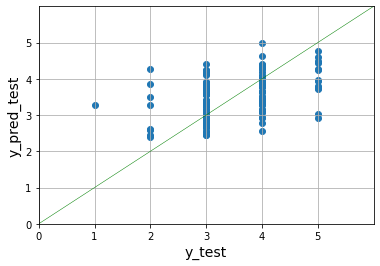

In [52]:
plt.scatter(df_temp['y_test'],df_temp['y_pred_test'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [53]:
rmse(y_pred_test,y_test)

0.7485408781718961

In [54]:
mean_absolute_error(y_pred_test,y_test)

0.5808016554977475